In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('../test6/train.csv')

In [3]:
train.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,UI_9185,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,No,0
1,UI_449,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,No,0
2,UI_9014,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,Low,No,0
3,UI_14987,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,Yes,0
4,UI_25532,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,Low,Yes,1


In [4]:
train.describe()

,average_runtime(minutes_per_week),ratings,netgain
count,19536.000000,19536.000000,19536.000000
mean,40.375665,0.038826,0.238022
std,12.483166,0.075971,0.425884
min,1.000000,0.000000,0.000000
25%,40.000000,0.027465,0.000000
50%,40.000000,0.027465,0.000000
75%,45.000000,0.027465,0.000000
max,99.000000,1.000000,1.000000


In [6]:
train.describe(exclude=np.number)

,UserID,realtionship_status,industry,genre,targeted_sex,airtime,airlocation,expensive,money_back_guarantee
count,19536,19536,19536,19536,19536,19536,19536,19536,19536
unique,19536,7,6,5,2,3,42,3,2
top,UI_7067,Married-civ-spouse,Pharma,Comedy,Male,Primetime,United-States,Low,Yes
freq,1,8899,7735,16699,12869,11755,17434,11756,9788


In [5]:
train.isnull().sum()

UserID                               0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

## EDA - Univariate

In [8]:
train.columns

Index(['UserID', 'realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')

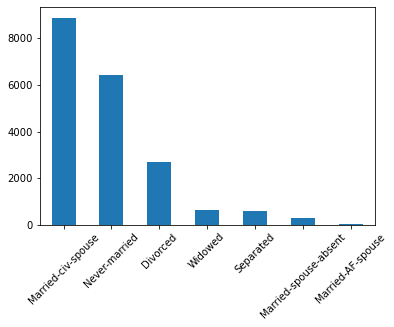

In [26]:
train['realtionship_status'].value_counts().plot(kind='bar', rot=45)
plt.show()

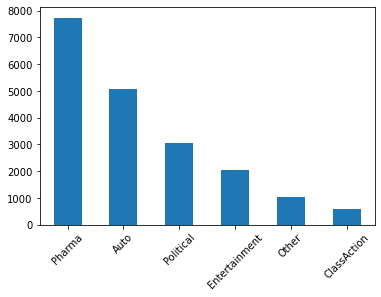

In [13]:
train['industry'].value_counts().plot(kind='bar', rot=45)
plt.show()

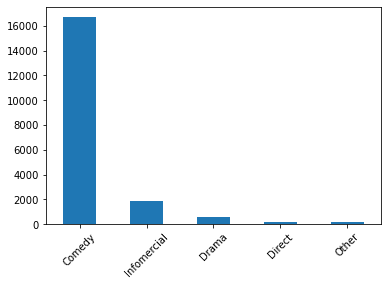

In [14]:
train['genre'].value_counts().plot(kind='bar', rot=45)
plt.show()

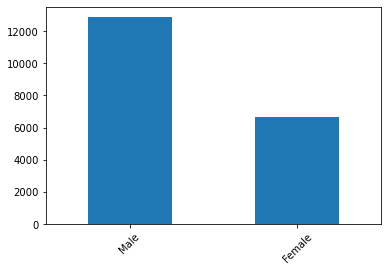

In [15]:
train['targeted_sex'].value_counts().plot(kind='bar', rot=45)
plt.show()

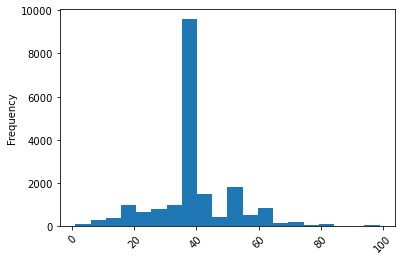

In [76]:
train['average_runtime(minutes_per_week)'].plot(kind='hist', rot=45, bins=20)
plt.show()

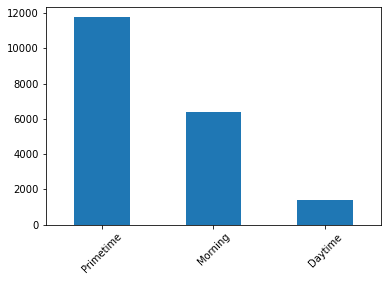

In [24]:
train['airtime'].value_counts().plot(kind='bar', rot=45)
plt.show()

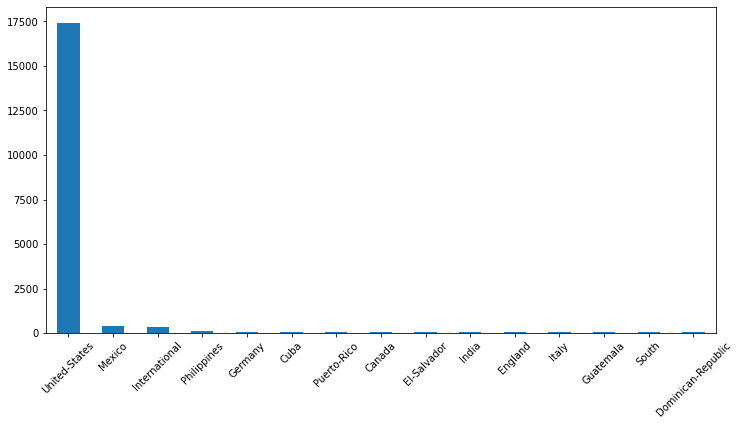

In [30]:
train['airlocation'].value_counts()[:15].plot(kind='bar', rot=45, figsize=(12,6))
plt.show()

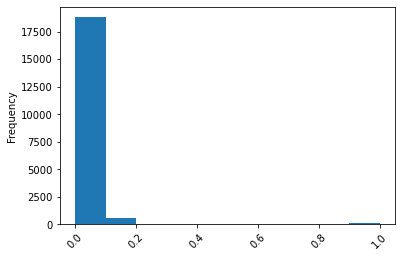

In [77]:
train['ratings'].plot(kind='hist', rot=45)
plt.show()

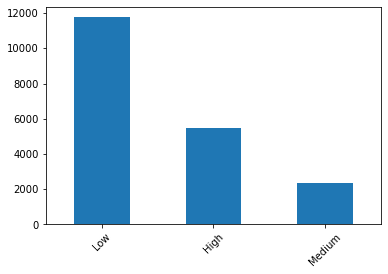

In [35]:
train['expensive'].value_counts().plot(kind='bar', rot=45)
plt.show()

In [37]:
train['money_back_guarantee'].value_counts()
# plt.show()

Yes    9788
No     9748
Name: money_back_guarantee, dtype: int64

## EDA - Bivariate

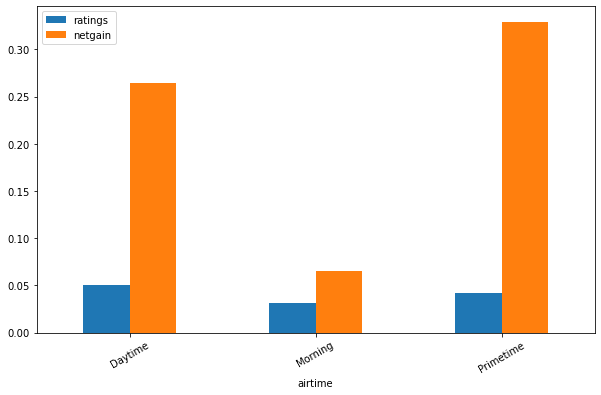

In [63]:
train.groupby(['airtime']).mean()[['ratings', 'netgain']].plot(kind='bar', rot=30, figsize=(10,6))
plt.show()

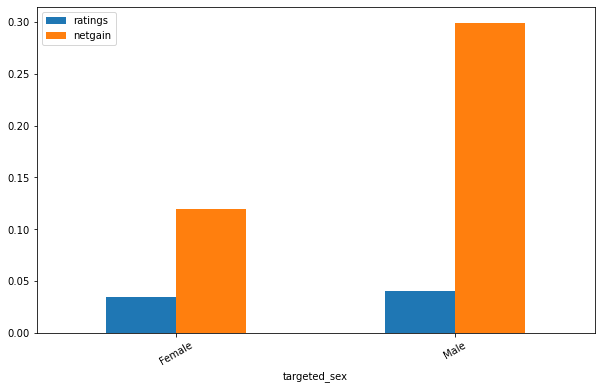

In [62]:
train.groupby(['targeted_sex']).mean()[['ratings', 'netgain']].plot(kind='bar', rot=30, figsize=(10,6))
plt.show()

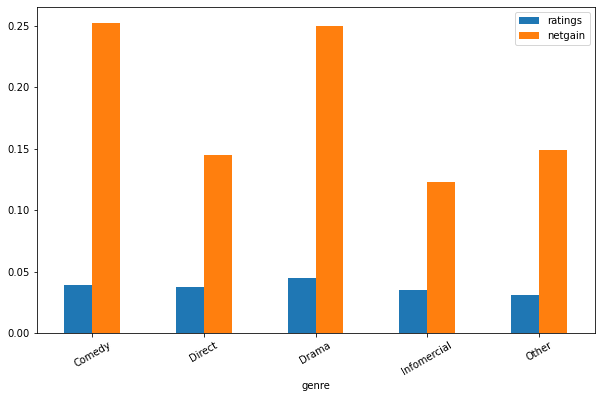

In [61]:
train.groupby(['genre']).mean()[['ratings', 'netgain']].plot(kind='bar', rot=30, figsize=(10,6))
plt.show()

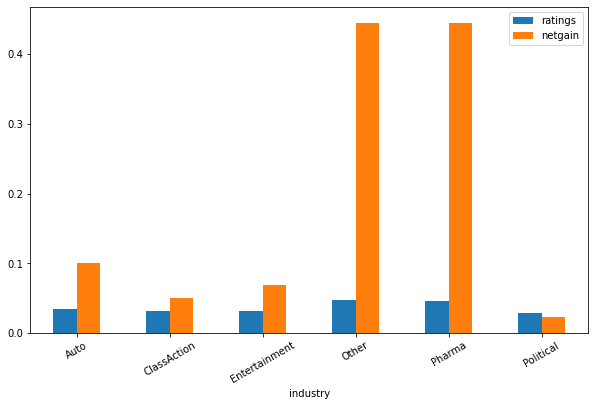

In [59]:
train.groupby(['industry']).mean()[['ratings', 'netgain']].plot(kind='bar', rot=30, figsize=(10,6))
plt.show()

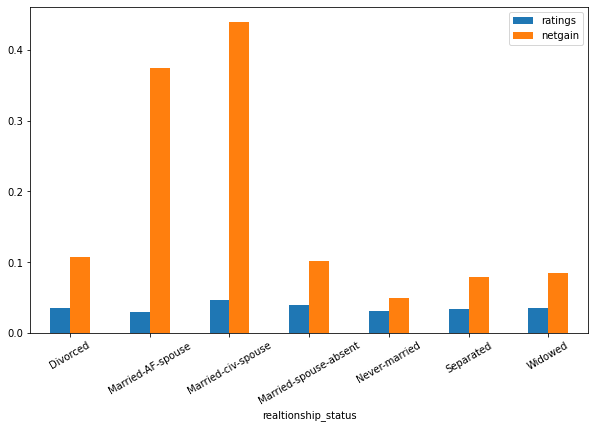

In [60]:
train.groupby(['realtionship_status']).mean()[['ratings', 'netgain']].plot(kind='bar', rot=30, figsize=(10,6))
plt.show()

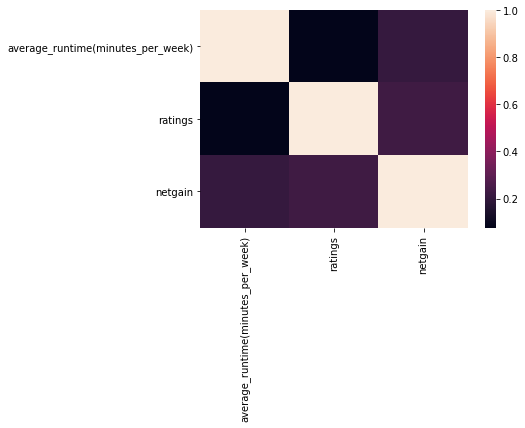

In [69]:
sns.heatmap(train.corr())

## Modelling

In [102]:
X = train.drop(['UserID', 'netgain'], axis=1)

y = train['netgain']

In [103]:
X_ohe = pd.get_dummies(X, drop_first=True)

In [104]:
X_ohe.head()

,average_runtime(minutes_per_week),ratings,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Separated,realtionship_status_Widowed,industry_ClassAction,industry_Entertainment,...,airlocation_South,airlocation_Taiwan,airlocation_Thailand,airlocation_Trinadad&Tobago,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,expensive_Low,expensive_Medium,money_back_guarantee_Yes
0,40,0.027465,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,35,0.027465,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,40,0.027465,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,40,0.027465,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,50,0.027465,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [105]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_ohe, y, train_size=0.8, random_state=10)

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

In [107]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
nb = GaussianNB()
rfc = RandomForestClassifier()

In [108]:
from sklearn.metrics import mean_squared_error

models = [('Logistic Regression', lr), ('Decision Tree Classifier', dtc), ('KNeighbors Classifier', knc), 
          ('Gaussian NB', nb), ('RandomForest Classifier', rfc)]

for m in models:
    model = m[1]
    name = m[0]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    print(f"Classification Report for {name}")
    print(classification_report(y_val, y_pred))

D:\GreyAtom\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2978
           1       0.61      0.40      0.48       930

    accuracy                           0.80      3908
   macro avg       0.72      0.66      0.68      3908
weighted avg       0.78      0.80      0.78      3908

Classification Report for Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2978
           1       0.59      0.45      0.51       930

    accuracy                           0.80      3908
   macro avg       0.72      0.68      0.69      3908
weighted avg       0.78      0.80      0.78      3908

Classification Report for KNeighbors Classifier
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      2978
           1       0.56      0.35      0.43       930

    accuracy                         

In [109]:
from sklearn.metrics import f1_score

models = [('Logistic Regression', lr), ('Decision Tree Classifier', dtc), ('KNeighbors Classifier', knc), 
          ('Gaussian NB', nb), ('RandomForest Classifier', rfc)]

for m in models:
    model = m[1]
    name = m[0]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    print(f"f1 score (binary) for {name}")
    print(f1_score(y_val, y_pred, average='binary'))

D:\GreyAtom\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f1 score (binary) for Logistic Regression
0.48073154800783807
f1 score (binary) for Decision Tree Classifier
0.5085365853658537
f1 score (binary) for KNeighbors Classifier
0.4332892998678996
f1 score (binary) for Gaussian NB
0.544873842222932
f1 score (binary) for RandomForest Classifier
0.5174563591022444


In [91]:
test = pd.read_csv('../test6/test.csv')
test.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,UI_8772,Never-married,Entertainment,Infomercial,Female,40,Primetime,United-States,0.027465,High,Yes
1,UI_13139,Divorced,Auto,Comedy,Female,40,Primetime,United-States,0.027465,Low,No
2,UI_15381,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,High,No
3,UI_15503,Never-married,Auto,Comedy,Male,30,Primetime,United-States,0.027465,High,Yes
4,UI_16556,Never-married,Political,Comedy,Male,70,Morning,United-States,0.027465,Low,No


In [92]:
test.isnull().sum()

UserID                               0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
dtype: int64

In [95]:
test['expensive'].value_counts()

Low       3937
High      1826
Medium     749
Name: expensive, dtype: int64

In [93]:
X_test = test.drop(['UserID'], axis=1)

In [94]:
X_test_ohe = pd.get_dummies(X_test, drop_first=True)
X_test_ohe.head()

,average_runtime(minutes_per_week),ratings,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Separated,realtionship_status_Widowed,industry_ClassAction,industry_Entertainment,...,airlocation_Scotland,airlocation_South,airlocation_Taiwan,airlocation_Thailand,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,expensive_Low,expensive_Medium,money_back_guarantee_Yes
0,40,0.027465,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,40,0.027465,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,40,0.027465,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,30,0.027465,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,70,0.027465,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [110]:
X_ohe.shape

(19536, 64)

In [111]:
X_ohe.columns

Index(['average_runtime(minutes_per_week)', 'ratings',
       'realtionship_status_Married-AF-spouse',
       'realtionship_status_Married-civ-spouse',
       'realtionship_status_Married-spouse-absent',
       'realtionship_status_Never-married', 'realtionship_status_Separated',
       'realtionship_status_Widowed', 'industry_ClassAction',
       'industry_Entertainment', 'industry_Other', 'industry_Pharma',
       'industry_Political', 'genre_Direct', 'genre_Drama',
       'genre_Infomercial', 'genre_Other', 'targeted_sex_Male',
       'airtime_Morning', 'airtime_Primetime', 'airlocation_Canada',
       'airlocation_China', 'airlocation_Columbia', 'airlocation_Cuba',
       'airlocation_Dominican-Republic', 'airlocation_Ecuador',
       'airlocation_El-Salvador', 'airlocation_England', 'airlocation_France',
       'airlocation_Germany', 'airlocation_Greece', 'airlocation_Guatemala',
       'airlocation_Haiti', 'airlocation_Holand-Netherlands',
       'airlocation_Honduras', 'airlocat

In [112]:
X_test_ohe.shape

(6512, 63)

In [113]:
X_test_ohe.columns
# airlocation_Trinadad&Tobago is missing 

Index(['average_runtime(minutes_per_week)', 'ratings',
       'realtionship_status_Married-AF-spouse',
       'realtionship_status_Married-civ-spouse',
       'realtionship_status_Married-spouse-absent',
       'realtionship_status_Never-married', 'realtionship_status_Separated',
       'realtionship_status_Widowed', 'industry_ClassAction',
       'industry_Entertainment', 'industry_Other', 'industry_Pharma',
       'industry_Political', 'genre_Direct', 'genre_Drama',
       'genre_Infomercial', 'genre_Other', 'targeted_sex_Male',
       'airtime_Morning', 'airtime_Primetime', 'airlocation_Canada',
       'airlocation_China', 'airlocation_Columbia', 'airlocation_Cuba',
       'airlocation_Dominican-Republic', 'airlocation_Ecuador',
       'airlocation_El-Salvador', 'airlocation_England', 'airlocation_France',
       'airlocation_Germany', 'airlocation_Greece', 'airlocation_Guatemala',
       'airlocation_Haiti', 'airlocation_Holand-Netherlands',
       'airlocation_Honduras', 'airlocat

In [114]:
X_ohe, X_test_ohe = X_ohe.align(X_test_ohe, join='inner', axis=1)

In [115]:
print(X_test_ohe.shape)
print(X_ohe.shape)

(6512, 63)
(19536, 63)


In [122]:
lr.fit(X_ohe, y)

y_pred_lr = lr.predict(X_test_ohe)
print(y_pred_lr)
submission1=pd.concat([pd.Series(y_pred_lr)], axis=1)
submission1.rename(columns={0:'netgain'},inplace=True)
submission1.to_csv('submission1.csv',index=None,header=True)

[0 0 0 ... 0 0 0]


D:\GreyAtom\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [123]:
dtc.fit(X_ohe, y)

y_pred_dtc = dtc.predict(X_test_ohe)
print(y_pred_dtc)
submission2=pd.concat([pd.Series(y_pred_dtc)], axis=1)
submission2.rename(columns={0:'netgain'},inplace=True)
submission2.to_csv('submission2.csv',index=None,header=True)

[0 0 0 ... 0 0 0]


In [124]:
knc.fit(X_ohe, y)

y_pred_knc = knc.predict(X_test_ohe)
print(y_pred_knc)
submission3=pd.concat([pd.Series(y_pred_knc)], axis=1)
submission3.rename(columns={0:'netgain'},inplace=True)
submission3.to_csv('submission3.csv',index=None,header=True)

[0 0 0 ... 0 0 0]


In [125]:
nb.fit(X_ohe, y)

y_pred_nb = nb.predict(X_test_ohe)
print(y_pred_nb)
submission4=pd.concat([pd.Series(y_pred_nb)], axis=1)
submission4.rename(columns={0:'netgain'},inplace=True)
submission4.to_csv('submission4.csv',index=None,header=True)

[0 1 1 ... 1 1 0]


In [126]:
rfc.fit(X_ohe, y)

y_pred_rfc = rfc.predict(X_test_ohe)
print(y_pred_rfc)
submission5=pd.concat([pd.Series(y_pred_rfc)], axis=1)
submission5.rename(columns={0:'netgain'},inplace=True)
submission5.to_csv('submission5.csv',index=None,header=True)

[0 0 0 ... 0 0 0]


## Improving Model Metric

In [127]:
train['netgain'].value_counts()

0    14886
1     4650
Name: netgain, dtype: int64

In [128]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=0.025, random_state=101)

svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_val)

print(f1_score(y_val, y_pred_svm, average='binary'))

0.0379746835443038


In [131]:
# best f1 score yet
# ‘modified_huber’ is smooth loss that brings tolerance to outliers as well as probability estimates.

from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)

sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_val)

print(f1_score(y_val, y_pred_sgd, average='binary'))

0.6100037608123355


In [185]:
sgd.fit(X_opt, y)

y_pred_sgd = sgd.predict(X_opt_test)
print(y_pred_sgd)
submission11=pd.concat([pd.Series(y_pred_sgd)], axis=1)
submission11.rename(columns={0:'netgain'},inplace=True)
submission11.to_csv('submission11.csv',index=None,header=True)

[0 0 0 ... 1 0 0]


In [138]:
from sklearn.linear_model import SGDClassifier
sgd1 = SGDClassifier(loss='perceptron', shuffle=True, random_state=101)

sgd1.fit(X_train, y_train)
y_pred_sgd1 = sgd1.predict(X_val)

print(f1_score(y_val, y_pred_sgd1, average='binary'))

0.4723076923076923


### Backward Elimination

In [146]:
Xbe = X_ohe.copy()
Xbe.head()

,average_runtime(minutes_per_week),ratings,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Separated,realtionship_status_Widowed,industry_ClassAction,industry_Entertainment,...,airlocation_Scotland,airlocation_South,airlocation_Taiwan,airlocation_Thailand,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,expensive_Low,expensive_Medium,money_back_guarantee_Yes
0,40,0.027465,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,35,0.027465,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,40,0.027465,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,40,0.027465,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,50,0.027465,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [147]:
Xbe.shape

(19536, 63)

In [148]:
# converts dataframe in array
Xbe = np.append(arr = np.ones((19536,1)).astype(int), values = Xbe, axis = 1)

In [149]:
Xbe

array([[1.0000000e+00, 4.0000000e+01, 2.7464672e-02, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.5000000e+01, 2.7464672e-02, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 4.0000000e+01, 2.7464672e-02, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 5.5000000e+01, 2.7464672e-02, ..., 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 3.8000000e+01, 2.7464672e-02, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 4.0000000e+01, 2.7464672e-02, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]])

In [150]:
Xbe.shape

(19536, 64)

In [151]:
Xbe.dtype

dtype('float64')

In [154]:
import statsmodels.api as sm

#creating matrix of features by backward elimination
X_opt = Xbe[:,:]
regressor_OLS = sm.OLS(endog = y.astype(float), exog = X_opt.astype(float)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                netgain   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     111.2
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:41:39   Log-Likelihood:                -8041.2
No. Observations:               19536   AIC:                         1.621e+04
Df Residuals:                   19472   BIC:                         1.671e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1241      0.071     -1.759      0.079      -0.262       0.014
x1             0.0034      0.000     15.122      0.000       0.003       0.004
x2             1.0117      0.035     29.091      0.000       0.944       1.080
x3             0.1421      0.096      1.479      0.139      -0.046       0.330
x4             0.0770      0.032      2.385      0.017       0.014       0.140
x5             0.0268      0.023      1.141      0.254      -0.019       0.073
x6             0.0344      0.010      3.480      0.001       0.015       0.054
x7             0.0052      0.017      0.312      0.755      -0.027       0.038
x8             0.0132      0.017      0.776      0.438      -0.020       0.047
x9            -0.0043      0.016     -0.263      0.793      -0.037       0.028
x10           -0.0266      0.010     -2.614      0.009      -0.047      -0.007
x11            0.2809      0.034      8.277      0.000       0.214       0.347
x12            0.2248      0.032      6.995      0.000       0.162       0.288
x13            0.0027      0.009      0.294      0.768      -0.016       0.021
x14           -0.0816      0.027     -3.020      0.003      -0.135      -0.029
x15            0.0115      0.022      0.517      0.605      -0.032       0.055
x16           -0.0551      0.009     -6.005      0.000      -0.073      -0.037
x17           -0.0200      0.029     -0.686      0.493      -0.077       0.037
x18            0.0145      0.007      1.955      0.051   -3.52e-05       0.029
x19           -0.0924      0.012     -7.452      0.000      -0.117      -0.068
x20            0.0474      0.011      4.295      0.000       0.026       0.069
x21            0.0784      0.082      0.950      0.342      -0.083       0.240
x22            0.0346      0.092      0.375      0.707      -0.146       0.215
x23            0.0178      0.089      0.199      0.842      -0.157       0.192
x24            0.0597      0.082      0.729      0.466      -0.101       0.220
x25           -0.0368      0.087     -0.422      0.673      -0.208       0.134
x26            0.0803      0.101      0.798      0.425      -0.117       0.277
x27            0.0194      0.083      0.235      0.814      -0.142       0.181
x28            0.0850      0.084      1.007      0.314      -0.080       0.250
x29            0.1322      0.107      1.236      0.216      -0.077       0.342
x30            0.0751      0.081      0.930      0.352      -0.083       0.233
x31           -0.0297      0.126     -0.236      0.814      -0.277       0.217
x32           -0.0169      0.086     -0.197      0.844      -0.186       0.152
x33            0.0342      0.099      0.344      0.731      -0.161       0.229
x34            0.0863      0.373      0.232      0.817      -0.644       0.816
x35           -0.0828      0.140     -0.591      0.554      -0.357       0.192
x3

In [155]:
# removing - x5,7,8,9,13,15,17,21,22,23,24,25-42,44,45,47,48,49,51-54,56,58,59,60,63

X_opt = Xbe[:, [0, 1, 2,3,4,6,10,11,12,14,16,18,19,20,43,46,50,55,57,61,62]]
regressor_OLS = sm.OLS(endog = y.astype(float), exog = X_opt.astype(float)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                netgain   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     348.8
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:48:39   Log-Likelihood:                -8058.6
No. Observations:               19536   AIC:                         1.616e+04
Df Residuals:                   19515   BIC:                         1.632e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0748      0.014     -5.276      0.000      -0.103      -0.047
x1             0.0034      0.000     15.316      0.000       0.003       0.004
x2             1.0143      0.035     29.210      0.000       0.946       1.082
x3             0.1338      0.096      1.399      0.162      -0.054       0.321
x4             0.0687      0.031      2.228      0.026       0.008       0.129
x5             0.0309      0.009      3.516      0.000       0.014       0.048
x6            -0.0280      0.010     -2.838      0.005      -0.047      -0.009
x7             0.2837      0.032      8.763      0.000       0.220       0.347
x8             0.2295      0.031      7.510      0.000       0.170       0.289
x9            -0.0824      0.027     -3.055      0.002      -0.135      -0.030
x10           -0.0540      0.009     -5.953      0.000      -0.072      -0.036
x11            0.0139      0.007      1.882      0.060      -0.001       0.028
x12           -0.0930      0.012     -7.844      0.000      -0.116      -0.070
x13            0.0467      0.011      4.378      0.000       0.026       0.068
x14            0.0981      0.054      1.807      0.071      -0.008       0.204
x15           -0.1419      0.019     -7.613      0.000      -0.178      -0.105
x16            0.1041      0.035      3.001      0.003       0.036       0.172
x17           -0.1720      0.053     -3.253      0.001      -0.276      -0.068
x18            0.1576      0.122      1.292      0.196      -0.081       0.397
x19           -0.0095      0.006     -1.584      0.113      -0.021       0.002
x20           -0.0160      0.009     -1.769      0.077      -0.034       0.002
==============================================================================
Omnibus:                     1487.816   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1661.183
Skew:                           0.683   Prob(JB):                         0.00
Kurtosis:                       2.584   Cond. No.                     1.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [157]:
# removing - x3,18,19

X_opt = Xbe[:, [0, 1, 2,4,6,10,11,12,14,16,18,19,20,43,46,50,55,62]]
regressor_OLS = sm.OLS(endog = y.astype(float), exog = X_opt.astype(float)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                netgain   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     410.0
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:55:01   Log-Likelihood:                -8061.7
No. Observations:               19536   AIC:                         1.616e+04
Df Residuals:                   19518   BIC:                         1.630e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0809      0.014     -5.983      0.000      -0.107      -0.054
x1             0.0034      0.000     15.364      0.000       0.003       0.004
x2             1.0139      0.035     29.197      0.000       0.946       1.082
x3             0.0560      0.030      1.896      0.058      -0.002       0.114
x4             0.0298      0.009      3.405      0.001       0.013       0.047
x5            -0.0283      0.010     -2.865      0.004      -0.048      -0.009
x6             0.2960      0.031      9.475      0.000       0.235       0.357
x7             0.2416      0.029      8.232      0.000       0.184       0.299
x8            -0.0822      0.027     -3.048      0.002      -0.135      -0.029
x9            -0.0541      0.009     -5.964      0.000      -0.072      -0.036
x10            0.0137      0.007      1.864      0.062      -0.001       0.028
x11           -0.0922      0.012     -7.787      0.000      -0.115      -0.069
x12            0.0467      0.011      4.379      0.000       0.026       0.068
x13            0.0972      0.054      1.791      0.073      -0.009       0.204
x14           -0.1419      0.019     -7.611      0.000      -0.178      -0.105
x15            0.1044      0.035      3.007      0.003       0.036       0.172
x16           -0.1718      0.053     -3.249      0.001      -0.275      -0.068
x17           -0.0095      0.008     -1.181      0.237      -0.025       0.006
==============================================================================
Omnibus:                     1489.140   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1664.987
Skew:                           0.684   Prob(JB):                         0.00
Kurtosis:                       2.585   Cond. No.                         877.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
X_opt = Xbe[:, [0, 1, 2,4,6,10,11,12,14,16,18,19,20,43,46,50,55]]
regressor_OLS = sm.OLS(endog = y.astype(float), exog = X_opt.astype(float)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                netgain   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     435.5
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:55:39   Log-Likelihood:                -8062.4
No. Observations:               19536   AIC:                         1.616e+04
Df Residuals:                   19519   BIC:                         1.629e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0821      0.013     -6.090      0.000      -0.109      -0.056
x1             0.0034      0.000     15.362      0.000       0.003       0.004
x2             1.0140      0.035     29.200      0.000       0.946       1.082
x3             0.0561      0.030      1.898      0.058      -0.002       0.114
x4             0.0298      0.009      3.405      0.001       0.013       0.047
x5            -0.0282      0.010     -2.854      0.004      -0.048      -0.009
x6             0.2960      0.031      9.472      0.000       0.235       0.357
x7             0.2415      0.029      8.228      0.000       0.184       0.299
x8            -0.0827      0.027     -3.064      0.002      -0.136      -0.030
x9            -0.0541      0.009     -5.965      0.000      -0.072      -0.036
x10            0.0137      0.007      1.865      0.062      -0.001       0.028
x11           -0.0921      0.012     -7.778      0.000      -0.115      -0.069
x12            0.0468      0.011      4.386      0.000       0.026       0.068
x13            0.0965      0.054      1.778      0.075      -0.010       0.203
x14           -0.1417      0.019     -7.601      0.000      -0.178      -0.105
x15            0.1048      0.035      3.020      0.003       0.037       0.173
x16           -0.1721      0.053     -3.253      0.001      -0.276      -0.068
==============================================================================
Omnibus:                     1489.567   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1665.235
Skew:                           0.684   Prob(JB):                         0.00
Kurtosis:                       2.585   Cond. No.                         877.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
X_opt

array([[1.0000000e+00, 4.0000000e+01, 2.7464672e-02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.5000000e+01, 2.7464672e-02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 4.0000000e+01, 2.7464672e-02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 5.5000000e+01, 2.7464672e-02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.8000000e+01, 2.7464672e-02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 4.0000000e+01, 2.7464672e-02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [161]:
X_opt = pd.DataFrame(X_opt)
X_opt

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,40.0,0.027465,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,35.0,0.027465,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,40.0,0.027465,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,40.0,0.027465,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,50.0,0.027465,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19531,1.0,40.0,0.027465,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
19532,1.0,15.0,0.027465,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19533,1.0,55.0,0.027465,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19534,1.0,38.0,0.027465,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [163]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_opt, y, train_size=0.8, random_state=10)

from sklearn.linear_model import SGDClassifier
sgd2 = SGDClassifier(loss='log', shuffle=True, random_state=101)

sgd2.fit(X_train1, y_train1)
y_pred_sgd2 = sgd2.predict(X_val1)

print(f1_score(y_val1, y_pred_sgd2, average='binary'))

0.16683022571148184


In [164]:
lr1 = LogisticRegression()

lr1.fit(X_train1, y_train1)
y_pred_lr1 = lr1.predict(X_val1)

print(f1_score(y_val1, y_pred_lr1, average='binary'))

0.4898493778650949


D:\GreyAtom\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [165]:
lr12 = LogisticRegression()
dtc12 = DecisionTreeClassifier()
knc12 = KNeighborsClassifier()
nb12 = GaussianNB()
rfc12 = RandomForestClassifier()

In [166]:
models = [('Logistic Regression', lr12), ('Decision Tree Classifier', dtc12), ('KNeighbors Classifier', knc12), 
          ('Gaussian NB', nb12), ('RandomForest Classifier', rfc12)]

for m in models:
    model = m[1]
    name = m[0]
    
    model.fit(X_train1, y_train1)
    y_pred12 = model.predict(X_val1)
    
    print(f"f1 score (binary) for {name}")
    print(f1_score(y_val1, y_pred12, average='binary'))

D:\GreyAtom\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f1 score (binary) for Logistic Regression
0.4898493778650949
f1 score (binary) for Decision Tree Classifier
0.5574365175332527
f1 score (binary) for KNeighbors Classifier
0.44686299615877073
f1 score (binary) for Gaussian NB
0.6233552631578947
f1 score (binary) for RandomForest Classifier
0.5552884615384616


In [167]:
Xbe_test = X_test_ohe.copy()
Xbe_test.head()

,average_runtime(minutes_per_week),ratings,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Separated,realtionship_status_Widowed,industry_ClassAction,industry_Entertainment,...,airlocation_Scotland,airlocation_South,airlocation_Taiwan,airlocation_Thailand,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,expensive_Low,expensive_Medium,money_back_guarantee_Yes
0,40,0.027465,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,40,0.027465,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,40,0.027465,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,30,0.027465,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,70,0.027465,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [170]:
Xbe_test.shape

(6512, 63)

In [171]:
# Adding costant (1) in all the rows

Xbe_test = np.append(arr = np.ones((6512,1)).astype(int), values = Xbe_test, axis = 1)
Xbe_test

array([[1.0000000e+00, 4.0000000e+01, 2.7464672e-02, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 4.0000000e+01, 2.7464672e-02, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 4.0000000e+01, 2.7464672e-02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 4.0000000e+01, 2.7464672e-02, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 3.5000000e+01, 2.7464672e-02, ..., 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 3.5000000e+01, 2.7464672e-02, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [172]:
X_opt_test = Xbe_test[:, [0, 1, 2,4,6,10,11,12,14,16,18,19,20,43,46,50,55]]
X_opt_test

array([[1.0000000e+00, 4.0000000e+01, 2.7464672e-02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 4.0000000e+01, 2.7464672e-02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 4.0000000e+01, 2.7464672e-02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 4.0000000e+01, 2.7464672e-02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.5000000e+01, 2.7464672e-02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.5000000e+01, 2.7464672e-02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [173]:
X_opt_test = pd.DataFrame(X_opt_test)
X_opt_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,40.0,0.027465,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,40.0,0.027465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,40.0,0.027465,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,30.0,0.027465,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,70.0,0.027465,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,1.0,40.0,0.027465,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6508,1.0,40.0,0.027465,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6509,1.0,40.0,0.027465,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6510,1.0,35.0,0.027465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [175]:
lr12.fit(X_opt, y)

y_pred_lr12 = lr12.predict(X_opt_test)
print(y_pred_lr12)
submission6=pd.concat([pd.Series(y_pred_lr12)], axis=1)
submission6.rename(columns={0:'netgain'},inplace=True)
submission6.to_csv('submission6.csv',index=None,header=True)

[0 0 0 ... 0 0 0]


D:\GreyAtom\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [176]:
dtc12.fit(X_opt, y)

y_pred_dtc12 = dtc12.predict(X_opt_test)
print(y_pred_dtc12)
submission7=pd.concat([pd.Series(y_pred_dtc12)], axis=1)
submission7.rename(columns={0:'netgain'},inplace=True)
submission7.to_csv('submission7.csv',index=None,header=True)

[0 0 0 ... 0 0 0]


In [177]:
knc12.fit(X_opt, y)

y_pred_knc12 = knc12.predict(X_opt_test)
print(y_pred_knc12)
submission8=pd.concat([pd.Series(y_pred_knc12)], axis=1)
submission8.rename(columns={0:'netgain'},inplace=True)
submission8.to_csv('submission8.csv',index=None,header=True)

[0 0 0 ... 0 0 0]


In [178]:
rfc12.fit(X_opt, y)

y_pred_rfc12 = rfc12.predict(X_opt_test)
print(y_pred_rfc12)
submission9=pd.concat([pd.Series(y_pred_rfc12)], axis=1)
submission9.rename(columns={0:'netgain'},inplace=True)
submission9.to_csv('submission9.csv',index=None,header=True)

[0 0 0 ... 0 0 0]


In [179]:
nb12.fit(X_opt, y)

y_pred_nb12 = nb12.predict(X_opt_test)
print(y_pred_nb12)
submission10=pd.concat([pd.Series(y_pred_nb12)], axis=1)
submission10.rename(columns={0:'netgain'},inplace=True)
submission10.to_csv('submission10.csv',index=None,header=True)

[0 0 0 ... 1 0 0]


In [181]:
svm12 = SVC(kernel='linear', C=0.025, random_state=101)

svm12.fit(X_train1, y_train1)
y_pred_svm12 = svm12.predict(X_val1)

print(f1_score(y_val1, y_pred_svm12, average='binary'))

0.0379746835443038


In [184]:
sgd12 = SGDClassifier(loss='log', shuffle=True, random_state=101)

sgd12.fit(X_train1, y_train1)
y_pred_sgd12 = sgd12.predict(X_val1)

print(f1_score(y_val1, y_pred_sgd12, average='binary'))

0.16683022571148184


In [188]:
pip install parfit

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for parfit: filename=parfit-0.220-py3-none-any.whl size=8662 sha256=eac22aa25445ddddd96398ab4650b7f9fb7a5e60c2fdf29925ccc7c86a651a7e
  Stored in directory: c:\users\dhruv\appdata\local\pip\cache\wheels\71\ce\ff\5bee3f34f7544130528c250644c041c8eecbafcee5a572acb4
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=0f9c0ffdee84fa03ad49d2ac398e0b91e7c61551306f7ed8b3575a39dd04187a
  Stored in directory: c:\users\dhruv\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built parfit sklearn
Note: you may need to restart the kernel to use updated packages.


In [192]:
# from sklearn.linear_model import SGDClassifier
# sgd = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)

# sgd.fit(X_train, y_train)
# y_pred_sgd = sgd.predict(X_val)

# print(f1_score(y_val, y_pred_sgd, average='binary'))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

from sklearn.linear_model import SGDClassifier
modelsgdc = SGDClassifier(loss="hinge", penalty="l2")
modelsgdc.fit(X_train, y_train)
y_pred_sgdc = modelsgdc.predict(X_val)
print(f1_score(y_val, y_pred_sgdc, average='binary'))

0.3193133047210301


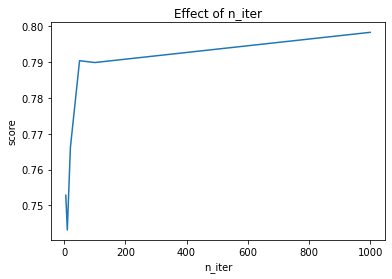

In [196]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    model = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
    model.fit(X_train, y_train)
    scores.append(model.score(X_val, y_val))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores) 

In [198]:
from sklearn.model_selection import GridSearchCV

params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

modelqqw = SGDClassifier(max_iter=1000)
clf = GridSearchCV(modelqqw, param_grid=params)

clf.fit(X_train, y_train)
print(clf.best_score_)

0.8064362175303904


In [199]:
print(clf.best_estimator_)

SGDClassifier(alpha=0.001, loss='log', penalty='l1')


In [202]:
sgdas = SGDClassifier(loss='log', shuffle=True, random_state=101, penalty='l1', alpha=0.001)

sgdas.fit(X_train, y_train)
y_pred_sgdas = sgdas.predict(X_val)

print(f1_score(y_val, y_pred_sgdas, average='binary'))
print(classification_report(y_val, y_pred_sgdas))

0.4513788098693759
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      2978
           1       0.69      0.33      0.45       930

    accuracy                           0.81      3908
   macro avg       0.76      0.64      0.67      3908
weighted avg       0.79      0.81      0.78      3908



In [203]:
sgdas = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101, penalty='l1', alpha=0.001)

sgdas.fit(X_train, y_train)
y_pred_sgdas = sgdas.predict(X_val)

print(f1_score(y_val, y_pred_sgdas, average='binary'))
print(classification_report(y_val, y_pred_sgdas))

0.4310216256524982
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      2978
           1       0.70      0.31      0.43       930

    accuracy                           0.80      3908
   macro avg       0.76      0.63      0.66      3908
weighted avg       0.79      0.80      0.77      3908



In [206]:
sgd123 = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)

sgd123.fit(X_train, y_train)
y_pred_sgd123 = sgd123.predict(X_val)

print(f1_score(y_val, y_pred_sgd123, average='binary'))
print(classification_report(y_val, y_pred_sgdas))

0.5865019011406845
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      2978
           1       0.70      0.31      0.43       930

    accuracy                           0.80      3908
   macro avg       0.76      0.63      0.66      3908
weighted avg       0.79      0.80      0.77      3908



In [288]:
sgd1234 = SGDClassifier(loss='squared_hinge', shuffle=True, random_state=101, penalty='l2', alpha=0.0001)

sgd1234.fit(X_train1, y_train1)
y_pred_sgd1234 = sgd1234.predict(X_val1)

print(f1_score(y_val1, y_pred_sgd1234, average='binary'))


0.6157996146435454


In [289]:
sgd1234.fit(X_opt, y)

y_pred_sgd1234 = sgd1234.predict(X_opt_test)
print(y_pred_sgd1234)
submission12=pd.concat([pd.Series(y_pred_sgd1234)], axis=1)
submission12.rename(columns={0:'netgain'},inplace=True)
submission12.to_csv('submission12.csv',index=None,header=True)

[0 0 0 ... 0 0 0]


In [260]:
# nb12.fit(X_opt, y)
# y_pred_nb12 = nb12.predict(X_opt_test)
# print(y_pred_nb12)
# submission10=pd.concat([pd.Series(y_pred_nb12)], axis=1)
# submission10.rename(columns={0:'netgain'},inplace=True)
# submission10.to_csv('submission10.csv',index=None,header=True)

# var_smoothing=1e-09
nb123 = GaussianNB()
nb123.fit(X_train1, y_train1)
y_pred123 = nb123.predict(X_val1)
    
print(f"f1 score (binary)")
print(f1_score(y_val1, y_pred123, average='binary'))

f1 score (binary)
0.6233552631578947


In [301]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_resample(X_ohe, y)

Xs_train, Xs_val, ys_train, ys_val = train_test_split(X_ohe, y, train_size=0.7, random_state=10)

print(Xs_train.shape)
print(Xs_val.shape)
print(ys_train.shape)
print(ys_val.shape)

(13675, 63)
(5861, 63)
(13675,)
(5861,)


In [302]:
Xs_train

,average_runtime(minutes_per_week),ratings,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Separated,realtionship_status_Widowed,industry_ClassAction,industry_Entertainment,...,airlocation_Scotland,airlocation_South,airlocation_Taiwan,airlocation_Thailand,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,expensive_Low,expensive_Medium,money_back_guarantee_Yes
13961,40,0.048880,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1776,40,0.027465,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
5738,35,0.027465,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6139,35,0.027465,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
13463,40,0.027465,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,50,0.130603,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
7291,50,0.027465,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
17728,35,0.027465,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7293,65,0.027465,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [309]:
sgdas1 = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101, penalty='none', alpha=0.001)

sgdas1.fit(Xs_train, ys_train)
y_predqwe = sgdas1.predict(Xs_val)
    
print(f"f1 score (binary)")
print(f1_score(ys_val, y_predqwe, average='binary'))

f1 score (binary)
0.5314900153609832


In [ ]:
# RFE - Recursive feature elimination
